In [1]:
import pandas as pd
import xml.etree.ElementTree as et 
import xmltodict
import seaborn as sns
import plotly.graph_objects as go


input_path = './export.xml'

with open(input_path, 'r') as xml_file:
    input_data = xmltodict.parse(xml_file.read())

records_list = input_data['HealthData']['Record']

df = pd.DataFrame(records_list)

df['@type'].unique()

# convert to date fromat
format = '%Y-%m-%d %H:%M:%S %z'

df['@creationDate'] = pd.to_datetime(df['@creationDate'],
                                     format=format)
df['@startDate'] = pd.to_datetime(df['@startDate'],
                                  format=format)
df['@endDate'] = pd.to_datetime(df['@endDate'],
                                format=format)

# rename coumns
df = df.rename(columns={"@type": "type", 
"@sourceName": "dataSource", 
"@creationDate": "creationDate", 
"@sourceVersion": "sourceVersion", 
"@startDate": "startDate",
"@endDate": "endDate",
"@value": "value",
"@device": "device",
"@unit": "unit"} , errors="raise")





df.type.unique()

array(['HKQuantityTypeIdentifierDietaryWater',
       'HKQuantityTypeIdentifierHeight',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierHeadphoneAudioExposure',
       'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage',
       'HKQuantityTypeIdentifierWalkingSpeed',
       'HKQuantityTypeIdentifierWalkingStepLength',
       'HKQuantityTypeIdentifierWalkingAsymmetryPercentage',
       'HKDataTypeSleepDurationGoal',
       'HKCategoryTypeIdentifierSleepAnalysis',
       'HKCategoryTypeIdentifierHeadphoneAudioExposureEvent'],
      dtype=object)

# Create daily dataframe

In [2]:
### Steps ###

# make dataframe with steps
dfSteps = df[df['type'] == 'HKQuantityTypeIdentifierStepCount']
 
# convert to numeric value
dfSteps.loc[:, 'value'] = pd.to_numeric(
    dfSteps.loc[:, 'value'])


# limit the devices in case of multiple devices
#df = df[df['@sourceName'] == 'iPhone XS']

#group by date
dfSteps = dfSteps.groupby('creationDate').sum()

# sum up over day
dfSteps = dfSteps.resample('D').sum()

dfSteps = dfSteps.rename(columns={"value": "steps"} , errors="raise")

### Water ###

# make dataframe with steps
dfWater = df[df['type'] == 'HKQuantityTypeIdentifierDietaryWater']

 
# convert to numeric value
dfWater.loc[:, 'value'] = pd.to_numeric(
    dfWater.loc[:, 'value'])

# limit the devices in case of multiple devices
#df = df[df['@sourceName'] == 'iPhone XS']

#group by date
dfWater = dfWater.groupby('creationDate').sum()

# sum up over day
dfWater = dfWater.resample('D').sum()

dfWater = dfWater.rename(columns={"value": "waterVolume"} , errors="raise")

### Walking speed ###

# make dataframe with steps
dfWalkingSpeed = df[df['type'] == 'HKQuantityTypeIdentifierWalkingSpeed']

 
# convert to numeric value
dfWalkingSpeed.loc[:, 'value'] = pd.to_numeric(
    dfWalkingSpeed.loc[:, 'value'])

# limit the devices in case of multiple devices
#df = df[df['@sourceName'] == 'iPhone XS']

#group by date
dfWalkingSpeed = dfWalkingSpeed.groupby('creationDate').mean()

# sum up over day
dfWalkingSpeed = dfWalkingSpeed.resample('D').mean()

dfWalkingSpeed = dfWalkingSpeed.rename(columns={"value": "walkingSpeed"} , errors="raise")

### Step Length ###

# make dataframe with steps
dfStepLength = df[df['type'] == 'HKQuantityTypeIdentifierWalkingStepLength']

 
# convert to numeric value
dfStepLength.loc[:, 'value'] = pd.to_numeric(
    dfStepLength.loc[:, 'value'])

# limit the devices in case of multiple devices
#df = df[df['@sourceName'] == 'iPhone XS']

#group by date
dfStepLength = dfStepLength.groupby('creationDate').mean()

# sum up over day
dfStepLength = dfStepLength.resample('D').mean()

dfStepLength = dfStepLength.rename(columns={"value": "stepLength"} , errors="raise")

### Active Energy Burned ###

# make dataframe with steps
dfActiveEnergyBurned = df[df['type'] == 'HKQuantityTypeIdentifierActiveEnergyBurned']

 
# convert to numeric value
dfActiveEnergyBurned.loc[:, 'value'] = pd.to_numeric(
    dfActiveEnergyBurned.loc[:, 'value'])

# limit the devices in case of multiple devices
#df = df[df['@sourceName'] == 'iPhone XS']

#group by date
dfActiveEnergyBurned = dfActiveEnergyBurned.groupby('creationDate').sum()

# sum up over day
dfActiveEnergyBurned = dfActiveEnergyBurned.resample('D').sum()

dfActiveEnergyBurned = dfActiveEnergyBurned.rename(columns={"value": "activeEnergyBurned"} , errors="raise")

dfActiveEnergyBurned





,activeEnergyBurned
creationDate,
2020-12-10 00:00:00+01:00,40.4625
2020-12-11 00:00:00+01:00,68.4750


In [3]:

fig = go.Figure([go.Scatter(x=dfSteps.index, y=dfSteps['steps'],  mode='markers',)])
fig.write_html("./steps.html")
fig.show()

In [4]:
dfMerged = pd.concat([dfWater, dfSteps, dfWalkingSpeed, dfActiveEnergyBurned, dfStepLength], axis=1)

dfMerged

,waterVolume,steps,walkingSpeed,activeEnergyBurned,stepLength
creationDate,,,,,
2020-11-27 00:00:00+01:00,NaN,890,5.418000,NaN,80.000000
2020-11-28 00:00:00+01:00,NaN,1874,4.299000,NaN,68.250000
2020-11-29 00:00:00+01:00,NaN,1259,5.324000,NaN,78.111111
2020-11-30 00:00:00+01:00,NaN,1503,4.654440,NaN,70.210000
2020-12-01 00:00:00+01:00,850.0,3869,4.911000,NaN,75.583333
...,...,...,...,...,...
2021-01-31 00:00:00+01:00,0.0,6121,3.509025,NaN,59.777083
2021-02-01 00:00:00+01:00,1300.0,4703,4.987200,NaN,71.266667
2021-02-02 00:00:00+01:00,700.0,2179,NaN,NaN,NaN


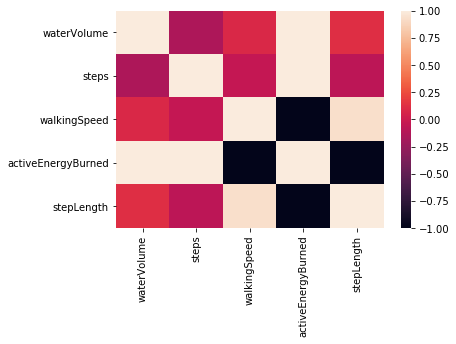

In [5]:
sns.heatmap(dfMerged.corr());
